# BxB Digital Project

Author: Shubham Singh Yadav

Documentation regarding the approach, analysis and findings for this project is provided in a seperate file attached in the same repository on GitHub. 

Link to the Github Repo: 

### Importing Libraries

In [26]:
#For working with data:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#For Scikit Learn:
import sklearn
import statsmodels.api as sm
from sklearn import linear_model

### Importing the Training Data

In [27]:
#Change this variable's string to your path where the data is stored 
bxb_train_file_location = r"C:\Users\Bada Rock\Downloads\Train_data.csv"

#Creating Dataframe for the train dataset(pallets_df)
pallets_df = pd.read_csv(bxb_train_file_location)

#To check the total number of samples while getting an idea about the structure of data
print(pallets_df.tail())

         Month  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth
115  2/28/2017            928621                 22.0        1005903
116  3/31/2017            927348                 22.0        1025539
117  4/30/2017            988990                 27.5        1050488
118  5/31/2017            978562                 21.0        1132481
119  6/30/2017           1047903                 21.5        1143552


In [28]:
#Checking if any value of the DataFrame is NaN:
pallets_df.isnull().sum()

Month                  0
TransfersInMonth       0
BusinessDaysInMonth    0
IssuesInMonth          0
dtype: int64

### Feature Engineering 1

***Why?***: 

This is done to further allow the conversion of this Time Series problem into a Supervised Learning Problem

***What?***: 

Breaking down the 'Month' column which contains string data as: 'mm/dd/yyyy' 
into two columns - 'Month_number' and 'Year', which just specifically contains the value of the
Month and Year. 

***Dropping***: 

Dates as they are of no use in monthwise prediction

In [29]:
#FIRST, WORKING ON THE TRAINING DATASET FIRST(pallets_df):
#Breaking down Month's 'mm/dd/yyyy' into 3 columns:
broken_down_df = (pallets_df['Month'].str.split('/', expand=True))
broken_down_df.columns = ['Month_number', 'Date', 'Year']
#Deleting the 'Date' column from this as we no longer need it: 
del broken_down_df['Date']

#Concatenating this with the original 'pallets_df' dataframe and replacing the original: 
pallets_df = pd.concat((broken_down_df, pallets_df), axis=1)
#Deleting the original 'Month' column as we no long need it
del pallets_df['Month']

#Final result after the transformations:
print(pallets_df.tail())

    Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth
115            2  2017            928621                 22.0        1005903
116            3  2017            927348                 22.0        1025539
117            4  2017            988990                 27.5        1050488
118            5  2017            978562                 21.0        1132481
119            6  2017           1047903                 21.5        1143552


### Converting all the values in the DataFrame to Numeric 


***Why?***: 

Necessary as both the values of both the new columns created (Month_number and Year) are of the type 'str' because of the command 'split' used on the them.

In [30]:
#Type before conversion: 
print('Type of the columns before conversion: \n', 
      type(pallets_df.Month_number.iloc[1]),
      type(pallets_df.IssuesInMonth.iloc[1])
     ) 

#Converting the whole dataframe into Numeric type: 
pallets_df = pallets_df.apply(pd.to_numeric)

#Type after conversion: 
print('\nType of the columns after conversion: \n', 
      type(pallets_df.Month_number.iloc[1]),
      type(pallets_df.IssuesInMonth.iloc[1])
     ) 


Type of the columns before conversion: 
 <class 'str'> <class 'numpy.int64'>

Type of the columns after conversion: 
 <class 'numpy.int64'> <class 'numpy.int64'>


### Analysis from Visualization



In [31]:
#Increasing the size of the image for better clarity:
matplotlib.rcParams['figure.figsize'] = [16, 9]

##### Analyzing relationship between the month and the number of Issues in that Month over the Years

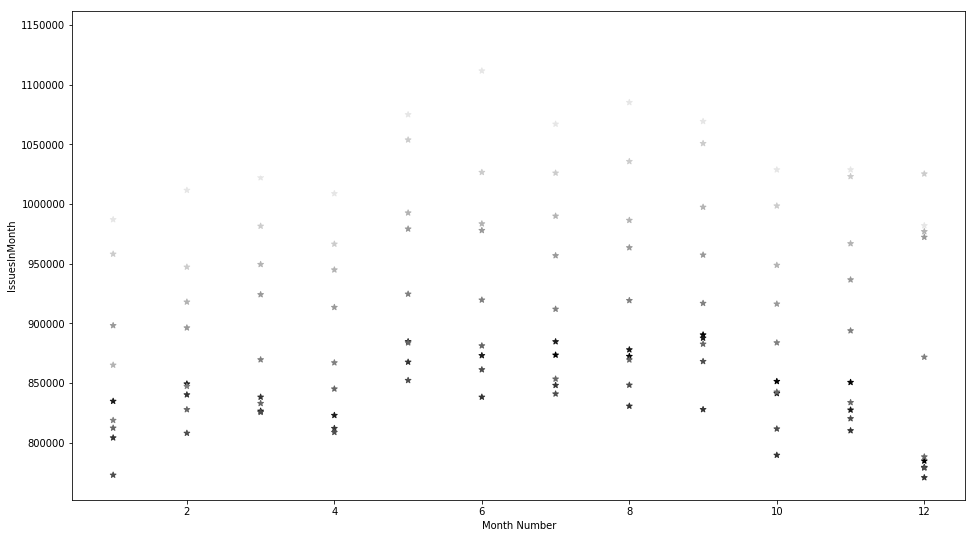

In [32]:
#Darker colors: Earlier Years
#Then fades as we move to the latest years
plt.scatter(pallets_df.Month_number, pallets_df.IssuesInMonth, c=pallets_df.Year,  marker='*')
plt.xlabel('Month Number')
plt.ylabel('IssuesInMonth')
plt.gray()
plt.show()

##### Analyzing relationship between the Transfers in a Month and the Issues in that Month over the Years

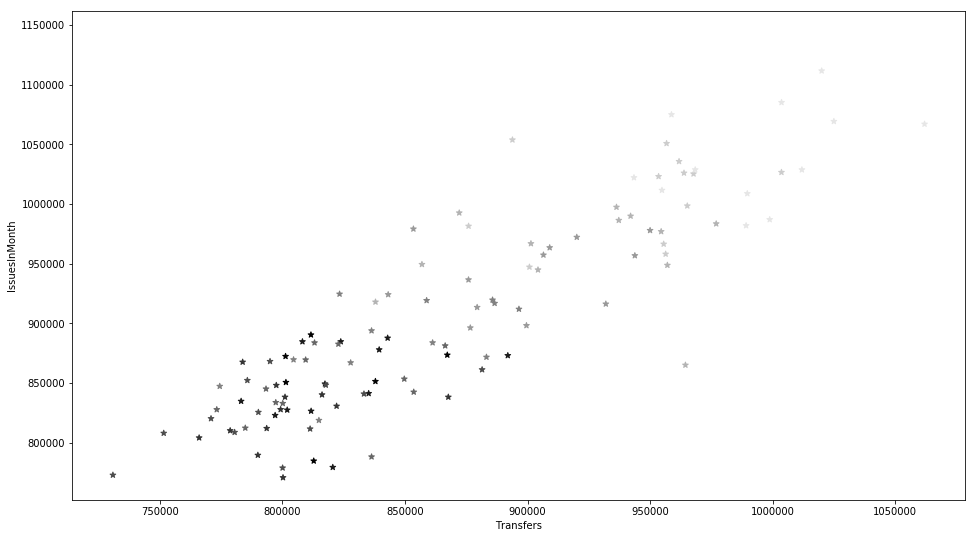

In [33]:
#Darker colors: Earlier Years
#Then fades as we move to the latest years
plt.scatter(pallets_df.TransfersInMonth, pallets_df.IssuesInMonth, c=pallets_df.Year, marker='*')
plt.xlabel('Transfers')
plt.ylabel('IssuesInMonth')
plt.gray()
plt.show()

##### Analyzing relationship between the Business Days in a Month and the Issues in that Month over the Years

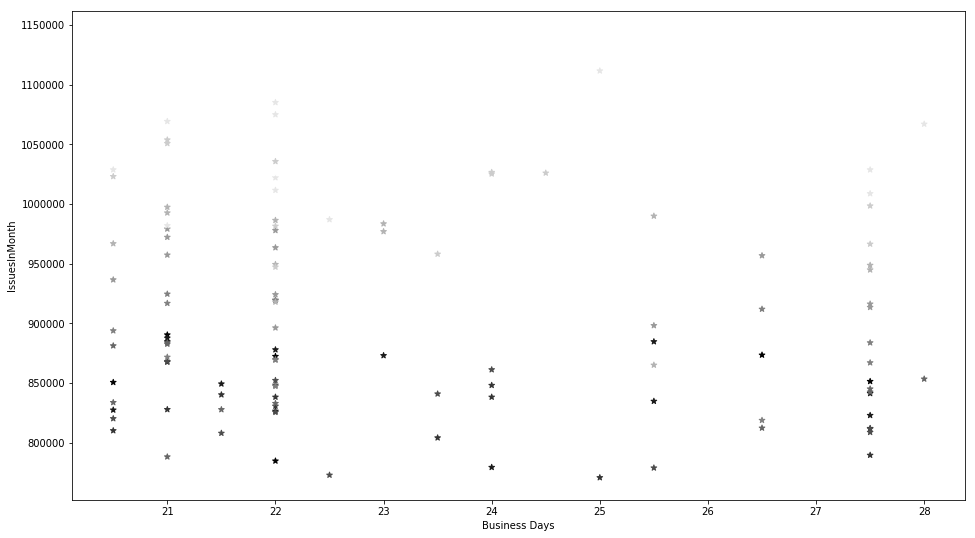

In [34]:
#Darker colors: Earlier Years
#Then fades as we move to the latest years
plt.scatter(pallets_df.BusinessDaysInMonth, pallets_df.IssuesInMonth, c=pallets_df.Year, marker='*')
plt.xlabel('Business Days')
plt.ylabel('IssuesInMonth')
plt.gray()
plt.show()

##### Analyzing relationship between the Year and Issues in those years with Scatter Plot

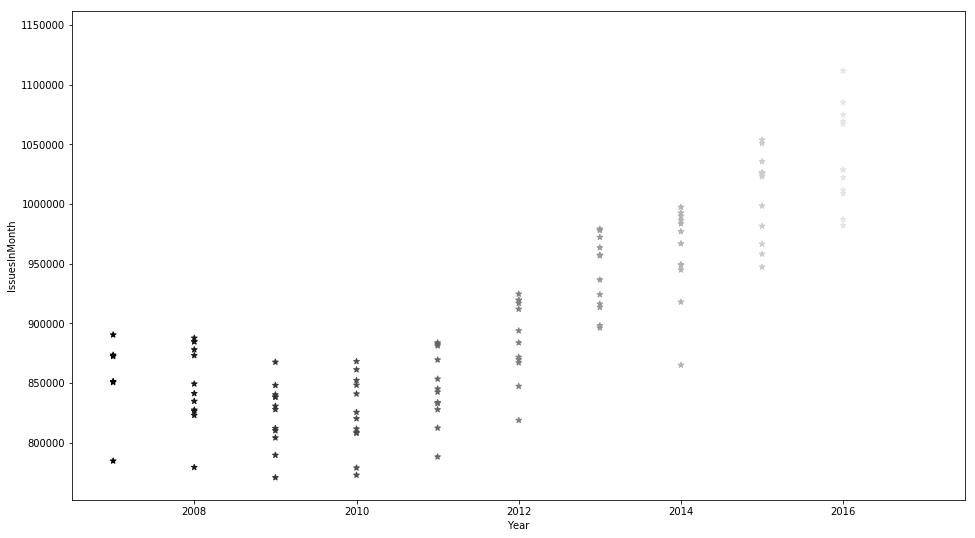

In [35]:
#Darker colors: Earlier Years
#Then fades into the latest year 
plt.scatter(pallets_df.Year, pallets_df.IssuesInMonth, c=pallets_df.Year, marker='*')
plt.xlabel('Year')
plt.ylabel('IssuesInMonth')
plt.gray()
plt.show()

##### Analyzing the Issues and Transfers over the years- Line plot

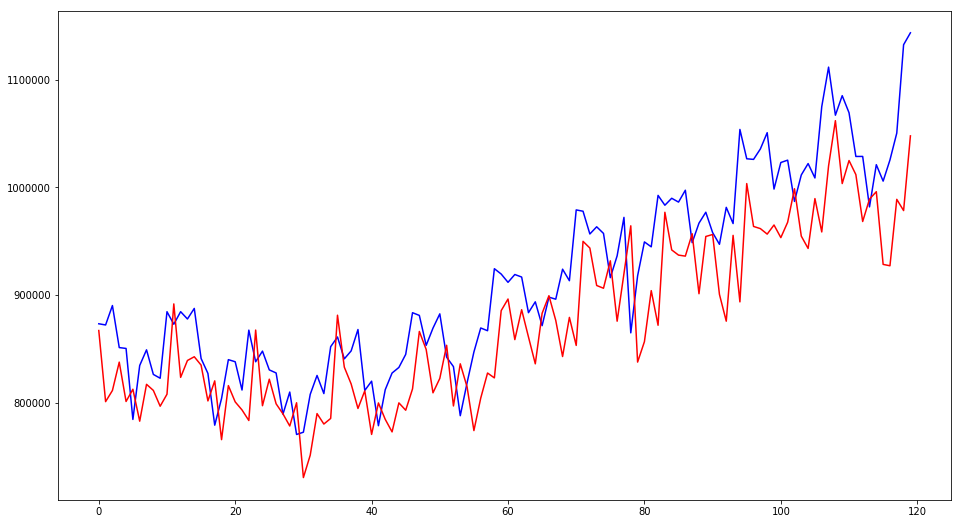

In [36]:
#Data is sorted in an increasing time order already
plt.plot(pallets_df.IssuesInMonth, 'b', pallets_df.TransfersInMonth, 'r')

### Important Conclusions

1. Transfers and Issues: The relationship between Transfers and Issues over the years have kept on linearly increasing with each other. Also they both have kept on increasing over the years after 2010.

2. Year and Issues: The relationship is mostly linear after 2010, and thus for forecasting with these 4 features, we can drop the years before 2010.

### Chossing the Data after 2010 to fit into a Model

IMPORTANT: This can be done to favor a simpler model which will ultimately result in a small deviation from the true values. Also, the months into which we have to forecast the values are small as compared to the size of the training data provided. 

In [37]:
#Selecting the rows where Year>=2010
pallets_df_2010 = pallets_df[pallets_df.Year >= 2010]
print(pallets_df_2010)

     Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth
30              1  2010            730797                 22.5         772891
31              2  2010            751537                 21.5         808016
32              3  2010            790163                 22.0         825555
33              4  2010            780467                 27.5         808747
34              5  2010            785663                 22.0         852275
35              6  2010            881460                 24.0         861242
36              7  2010            833250                 23.5         840947
37              8  2010            817674                 22.0         848339
38              9  2010            794917                 21.0         868176
39             10  2010            811274                 27.5         811627
40             11  2010            770833                 20.5         820254
41             12  2010            800052                 25.5  

In [38]:
#Resetting the Index so that it doesn't create a problem any further: 
pallets_df_2010 = pallets_df_2010.reset_index(drop=True)

In [39]:
print(pallets_df_2010.tail())

    Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth
85             2  2017            928621                 22.0        1005903
86             3  2017            927348                 22.0        1025539
87             4  2017            988990                 27.5        1050488
88             5  2017            978562                 21.0        1132481
89             6  2017           1047903                 21.5        1143552


###  Converting the Time Series problem into Supervised Learning problem 

***Why?*** : 

Forecasting problem concerning time can be solved by Supervised Learning algorithms too such as SVM and other Regression Models. 

***How?*** : 

The features including the Number of Issues from the previous time step can be taken as an input in predicting the number of issues in the current month.

### Feature Engineering 2

In [40]:
#Choosing rows 1-89 as the values for time step t:
pallets_df_t = pallets_df_2010[0:89]
print(pallets_df_t)

    Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth
0              1  2010            730797                 22.5         772891
1              2  2010            751537                 21.5         808016
2              3  2010            790163                 22.0         825555
3              4  2010            780467                 27.5         808747
4              5  2010            785663                 22.0         852275
5              6  2010            881460                 24.0         861242
6              7  2010            833250                 23.5         840947
7              8  2010            817674                 22.0         848339
8              9  2010            794917                 21.0         868176
9             10  2010            811274                 27.5         811627
10            11  2010            770833                 20.5         820254
11            12  2010            800052                 25.5         778914

In [41]:
#Choosing rows 2-90 as the values for time step t+1:
pallets_df_tplusone = pallets_df_2010[1:]
pallets_df_tplusone = pallets_df_tplusone.reset_index(drop=True)
print(pallets_df_tplusone)

    Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth
0              2  2010            751537                 21.5         808016
1              3  2010            790163                 22.0         825555
2              4  2010            780467                 27.5         808747
3              5  2010            785663                 22.0         852275
4              6  2010            881460                 24.0         861242
5              7  2010            833250                 23.5         840947
6              8  2010            817674                 22.0         848339
7              9  2010            794917                 21.0         868176
8             10  2010            811274                 27.5         811627
9             11  2010            770833                 20.5         820254
10            12  2010            800052                 25.5         778914
11             1  2011            784820                 26.5         812343

In [42]:
#Changing the column names for the Dataframe which has values for time step t+1
#to allow concatenation without a problem:
pallets_df_tplusone.columns=['Month_number_1', 'Year_1', 'TransfersInMonth_1', 'BusinessDaysInMonth_1', 'IssuesInMonth_1']
print(pallets_df_tplusone)

    Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1  \
0                2    2010              751537                   21.5   
1                3    2010              790163                   22.0   
2                4    2010              780467                   27.5   
3                5    2010              785663                   22.0   
4                6    2010              881460                   24.0   
5                7    2010              833250                   23.5   
6                8    2010              817674                   22.0   
7                9    2010              794917                   21.0   
8               10    2010              811274                   27.5   
9               11    2010              770833                   20.5   
10              12    2010              800052                   25.5   
11               1    2011              784820                   26.5   
12               2    2011              773179     

In [43]:
#Checking whether both the dataframes t and t+1 have the same shape: 
print(pallets_df_t.shape)
print(pallets_df_tplusone.shape)

(89, 5)
(89, 5)


In [44]:
#Finally, concatenating both the dataframes side by side (axis=1):
pallets_df_timeseries = pd.concat((pallets_df_t, pallets_df_tplusone), axis=1)
print(pallets_df_timeseries.tail())

    Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth  \
84             1  2017            996091                 26.5        1021160   
85             2  2017            928621                 22.0        1005903   
86             3  2017            927348                 22.0        1025539   
87             4  2017            988990                 27.5        1050488   
88             5  2017            978562                 21.0        1132481   

    Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1  \
84               2    2017              928621                   22.0   
85               3    2017              927348                   22.0   
86               4    2017              988990                   27.5   
87               5    2017              978562                   21.0   
88               6    2017             1047903                   21.5   

    IssuesInMonth_1  
84          1005903  
85          1025539  
86          10

### Setting the Training Input/Output

In [45]:
#Setting the IssuesInMonth feature as the output for each sample of the new DataFrame
Y = pallets_df_timeseries.IssuesInMonth_1
Y

0      808016
1      825555
2      808747
3      852275
4      861242
5      840947
6      848339
7      868176
8      811627
9      820254
10     778914
11     812343
12     827800
13     832989
14     845130
15     883790
16     881286
17     853442
18     869483
19     882715
20     842505
21     833755
22     788199
23     818809
24     847348
25     869606
26     867072
27     924636
28     919665
29     911985
       ...   
59     958134
60     947264
61     981564
62     966524
63    1053853
64    1026649
65    1026064
66    1035764
67    1050853
68     998531
69    1023173
70    1025357
71     987051
72    1011636
73    1022201
74    1008830
75    1075022
76    1111690
77    1067078
78    1085209
79    1069346
80    1028791
81    1028815
82     981980
83    1021160
84    1005903
85    1025539
86    1050488
87    1132481
88    1143552
Name: IssuesInMonth_1, Length: 89, dtype: int64

In [46]:
#Taking out column names:
column_names = pallets_df_timeseries.columns

#Setting all the Input features in a DataFrame: 
X = pallets_df_timeseries[column_names[0:9]]
X

,Month_number,Year,TransfersInMonth,BusinessDaysInMonth,IssuesInMonth,Month_number_1,Year_1,TransfersInMonth_1,BusinessDaysInMonth_1
0,1,2010,730797,22.5,772891,2,2010,751537,21.5
1,2,2010,751537,21.5,808016,3,2010,790163,22.0
2,3,2010,790163,22.0,825555,4,2010,780467,27.5
3,4,2010,780467,27.5,808747,5,2010,785663,22.0
4,5,2010,785663,22.0,852275,6,2010,881460,24.0
5,6,2010,881460,24.0,861242,7,2010,833250,23.5
6,7,2010,833250,23.5,840947,8,2010,817674,22.0
7,8,2010,817674,22.0,848339,9,2010,794917,21.0
8,9,2010,794917,21.0,868176,10,2010,811274,27.5
9,10,2010,811274,27.5,811627,11,2010,770833,20.5


In [47]:
#Setting up Training and Test set 
from sklearn.model_selection import train_test_split

#The functions randomly picks up samples from the dataset and puts them in train and test dataset:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.0681, random_state=7)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82, 9)
(82,)
(7, 9)
(7,)


### Constructing Models

In [48]:
#Creating a function for MAPE as there is no inbuilt function in Scikit-Learn for that:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

##### Linear Regression Model:

In [49]:
#Creating the model:
lm = linear_model.LinearRegression()

#Fitting the model: 
lin_model = lm.fit(X_train,y_train)

#Predictions 
predictions_linear_model = lm.predict(X_test)
print('\n Predictions-> \n', predictions_linear_model)
print('\n True values were -> \n', y_test)

#Calculating MAPE:
MAPE_on_Linearmodel = mean_absolute_percentage_error(y_test, predictions_linear_model)
print('The MAPE on the Linear Model is: \n', MAPE_on_Linearmodel)


 Predictions-> 
 [848303.92077744 978846.62387048 847824.45195407 849100.39521195
 856525.52687332 950277.31930824 780253.74292874]

 True values were -> 
 13    832989
51    992663
17    853442
20    842505
12    827800
41    956841
11    812343
Name: IssuesInMonth_1, dtype: int64
The MAPE on the Linear Model is: 
 1.8253918623445904


# Predicting values of Issues for the next 6 months

In [50]:
#Dataset location
bxb_test_file_location = r"C:\Users\Bada Rock\Downloads\Test_data.csv"
#Loading Datset: 
input_data_sixmonths = pd.read_csv(bxb_test_file_location)

### Feature Engineering Again

***Why?***: 

This is done to further allow the conversion of this Time Series problem into a Supervised Learning Problem

***What?***: 

Breaking down the 'Month' column which contains string data as: 'mm/dd/yyyy' 
into two columns - 'Month_number' and 'Year', which just specifically contains the value of the
Month and Year. 

***Dropping***: 

Dates as they are of no use in monthwise prediction

In [51]:
#FIRST, WORKING ON THE TRAINING DATASET FIRST(pallets_df):
#Breaking down Month's 'mm/dd/yyyy' into 3 columns:
broken_down_df = (input_data_sixmonths['Month'].str.split('/', expand=True))
broken_down_df.columns = ['Month_number', 'Date', 'Year']
#Deleting the 'Date' column from this as we no longer need it: 
del broken_down_df['Date']

#Concatenating this with the original 'pallets_df' dataframe and replacing the original: 
input_data_sixmonths = pd.concat((broken_down_df, input_data_sixmonths), axis=1)
#Deleting the original 'Month' column as we no long need it
del input_data_sixmonths['Month']

#Final result after the transformations:
print(input_data_sixmonths)

  Month_number  Year  TransfersInMonth  BusinessDaysInMonth
0            7  2017           1056019                 27.0
1            8  2017           1021590                 22.0
2            9  2017           1010038                 21.0
3           10  2017           1067153                 27.5
4           11  2017           1042316                 20.5
5           12  2017           1059981                 20.0


### Converting all the values in the DataFrame to Numeric 


***Why?***: 

Necessary as both the values of both the new columns created (Month_number and Year) are of the type 'str' because of the command 'split' used on the them.

In [52]:
#Type before conversion: 
print('Type of the columns before conversion: \n', 
      type(input_data_sixmonths.Month_number.iloc[3])
     ) 

#Converting the whole dataframe into Numeric type: 
input_data_sixmonths = input_data_sixmonths.apply(pd.to_numeric)

#Type after conversion: 
print('\nType of the columns after conversion: \n', 
      type(input_data_sixmonths.Month_number.iloc[3])
     ) 


Type of the columns before conversion: 
 <class 'str'>

Type of the columns after conversion: 
 <class 'numpy.int64'>


##### Changing the column names

For the month of July, this has to be done so as to allow the concatenation of the dataframes pallets_df_timeseries and this input_data_sixmonths columnwise.

In [53]:
input_data_sixmonths.columns=['Month_number_1', 'Year_1', 'TransfersInMonth_1', 'BusinessDaysInMonth_1']
input_data_sixmonths

,Month_number_1,Year_1,TransfersInMonth_1,BusinessDaysInMonth_1
0,7,2017,1056019,27.0
1,8,2017,1021590,22.0
2,9,2017,1010038,21.0
3,10,2017,1067153,27.5
4,11,2017,1042316,20.5
5,12,2017,1059981,20.0


##### Predicting the number of Pallets issued in July, 2017:

In [54]:
#Taking all two rows 5 features of the previous month: 
temp_1 = pallets_df_2010.loc[88:89]
temp_1 = temp_1.reset_index(drop=True)
temp_1 = temp_1.sort_values(['Month_number'], ascending=False)
temp_1 = temp_1.reset_index(drop=True)
print(temp_1)

#Taking two rows of 4 features from the Test_data.csv file: 
temp_2 = input_data_sixmonths.loc[0:1]
temp_2 = temp_2.reset_index(drop=True)
print(temp_2)

#Concatenating both the above dataframes: 
july_2017_input_data = pd.concat((temp_1, temp_2), axis=1)
print(july_2017_input_data)

#Choosing just the first row of the dataframe to get the Input features for predicting
#the number of issues in the July Month: 
july_2017_input_data = july_2017_input_data.loc[0]
print(july_2017_input_data)

#Predictions 
#As it is a single sample, we have to reshape it: 
july_2017_input_data = july_2017_input_data.reshape(1, -1)

#Predictions for that single sample: 
prediction_july = lm.predict(july_2017_input_data)
print('\n Prediction of July-> \n', prediction_july)

   Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth
0             6  2017           1047903                 21.5        1143552
1             5  2017            978562                 21.0        1132481
   Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1
0               7    2017             1056019                   27.0
1               8    2017             1021590                   22.0
   Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth  \
0             6  2017           1047903                 21.5        1143552   
1             5  2017            978562                 21.0        1132481   

   Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1  
0               7    2017             1056019                   27.0  
1               8    2017             1021590                   22.0  
Month_number                   6.0
Year                        2017.0
TransfersInMonth         1047903.0
BusinessD

C:\Users\Bada Rock\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


##### Predictions for August, 2017:

In [55]:
#Creating a new column in the input_data_sixmonths dataframe in which we'll fill the 
#predictions we get along the way for each month: 
input_data_sixmonths['IssuesInMonth'] = pd.Series(np.random.randn(6), index=input_data_sixmonths.index)

In [56]:
#Setting the number of issues of the July month to its predicted value: 
input_data_sixmonths.IssuesInMonth[0] = prediction_july
input_data_sixmonths

#Taking all two rows 5 features of the previous month: 
temp_1 = input_data_sixmonths.loc[0:1]
temp_1 = temp_1.reset_index(drop=True)
temp_1.columns = ['Month_number', 'Year', 'TransfersInMonth', 'BusinessDaysInMonth', 'IssuesInMonth']
print(temp_1)

#Taking two rows of 4 features from the Test_data.csv file: 
temp_2 = input_data_sixmonths.loc[1:2]
temp_2 = temp_2.reset_index(drop=True)
del temp_2['IssuesInMonth']
print(temp_2)

#Concatenating both the above dataframes: 
august_2017_input_data = pd.concat((temp_1, temp_2), axis=1)
print(august_2017_input_data)

#Choosing just the first row of the dataframe to get the Input features for predicting
#the number of issues in the July Month: 
august_2017_input_data = august_2017_input_data.loc[0]
print(august_2017_input_data)
print(type(august_2017_input_data))

#Predictions:
#As it is a single sample, we have to reshape it: 
august_2017_input_data = august_2017_input_data.reshape(1, -1)

#Predictions for that single sample: 
prediction_august = lm.predict(august_2017_input_data)
print('\n Prediction for August-> \n', prediction_august)

   Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth
0             7  2017           1056019                 27.0   1.104446e+06
1             8  2017           1021590                 22.0   1.693019e+00
   Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1
0               8    2017             1021590                   22.0
1               9    2017             1010038                   21.0
   Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth  \
0             7  2017           1056019                 27.0   1.104446e+06   
1             8  2017           1021590                 22.0   1.693019e+00   

   Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1  
0               8    2017             1021590                   22.0  
1               9    2017             1010038                   21.0  
Month_number             7.000000e+00
Year                     2.017000e+03
TransfersInMonth         1.056019e+06


C:\Users\Bada Rock\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Bada Rock\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


##### Predictions for September, 2017:

In [57]:
#Setting the number of issues of the July month to its predicted value: 
input_data_sixmonths.IssuesInMonth[1] = prediction_august
input_data_sixmonths

#Taking all two rows 5 features of the previous month: 
temp_1 = input_data_sixmonths.loc[1:2]
temp_1 = temp_1.reset_index(drop=True)
temp_1.columns = ['Month_number', 'Year', 'TransfersInMonth', 'BusinessDaysInMonth', 'IssuesInMonth']
print(temp_1)

#Taking two rows of 4 features from the Test_data.csv file: 
temp_2 = input_data_sixmonths.loc[2:3]
temp_2 = temp_2.reset_index(drop=True)
del temp_2['IssuesInMonth']
print(temp_2)

#Concatenating both the above dataframes: 
september_2017_input_data = pd.concat((temp_1, temp_2), axis=1)
print(september_2017_input_data)

#Choosing just the first row of the dataframe to get the Input features for predicting
#the number of issues in the July Month: 
september_2017_input_data = september_2017_input_data.loc[0]
print(september_2017_input_data)
print(type(september_2017_input_data))

#Predictions 
#As it is a single sample, we have to reshape it: 
september_2017_input_data = september_2017_input_data.reshape(1, -1)

#Predictions for that single sample: 
prediction_september = lm.predict(september_2017_input_data)
print('\n Predictions-> \n', prediction_september)

   Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth
0             8  2017           1021590                 22.0   1.112349e+06
1             9  2017           1010038                 21.0   7.132466e-01
   Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1
0               9    2017             1010038                   21.0
1              10    2017             1067153                   27.5
   Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth  \
0             8  2017           1021590                 22.0   1.112349e+06   
1             9  2017           1010038                 21.0   7.132466e-01   

   Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1  
0               9    2017             1010038                   21.0  
1              10    2017             1067153                   27.5  
Month_number             8.000000e+00
Year                     2.017000e+03
TransfersInMonth         1.021590e+06


C:\Users\Bada Rock\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Bada Rock\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


##### Predictions for October, 2017:

In [58]:
#Setting the number of issues of the July month to its predicted value: 
input_data_sixmonths.IssuesInMonth[2] = prediction_september
input_data_sixmonths

#Taking all two rows 5 features of the previous month: 
temp_1 = input_data_sixmonths.loc[2:3]
temp_1 = temp_1.reset_index(drop=True)
temp_1.columns = ['Month_number', 'Year', 'TransfersInMonth', 'BusinessDaysInMonth', 'IssuesInMonth']
print(temp_1)

#Taking two rows of 4 features from the Test_data.csv file: 
temp_2 = input_data_sixmonths.loc[3:4]
temp_2 = temp_2.reset_index(drop=True)
del temp_2['IssuesInMonth']
print(temp_2)

#Concatenating both the above dataframes: 
october_2017_input_data = pd.concat((temp_1, temp_2), axis=1)
print(october_2017_input_data)

#Choosing just the first row of the dataframe to get the Input features for predicting
#the number of issues in the July Month: 
october_2017_input_data = october_2017_input_data.loc[0]
print(october_2017_input_data)
print(type(october_2017_input_data))

#Predictions 
#As it is a single sample, we have to reshape it: 
october_2017_input_data = october_2017_input_data.reshape(1, -1)

#Predictions for that single sample: 
prediction_october = lm.predict(october_2017_input_data)
print('\n Predictions-> \n', prediction_october)

   Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth
0             9  2017           1010038                 21.0   1.100025e+06
1            10  2017           1067153                 27.5   1.361150e+00
   Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1
0              10    2017             1067153                   27.5
1              11    2017             1042316                   20.5
   Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth  \
0             9  2017           1010038                 21.0   1.100025e+06   
1            10  2017           1067153                 27.5   1.361150e+00   

   Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1  
0              10    2017             1067153                   27.5  
1              11    2017             1042316                   20.5  
Month_number             9.000000e+00
Year                     2.017000e+03
TransfersInMonth         1.010038e+06


C:\Users\Bada Rock\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Bada Rock\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


##### Predictions for November, 2017:

In [59]:
#Setting the number of issues of the July month to its predicted value: 
input_data_sixmonths.IssuesInMonth[3] = prediction_october
input_data_sixmonths

#Taking all two rows 5 features of the previous month: 
temp_1 = input_data_sixmonths.loc[3:4]
temp_1 = temp_1.reset_index(drop=True)
temp_1.columns = ['Month_number', 'Year', 'TransfersInMonth', 'BusinessDaysInMonth', 'IssuesInMonth']
print(temp_1)

#Taking two rows of 4 features from the Test_data.csv file: 
temp_2 = input_data_sixmonths.loc[4:5]
temp_2 = temp_2.reset_index(drop=True)
del temp_2['IssuesInMonth']
print(temp_2)

#Concatenating both the above dataframes: 
november_2017_input_data = pd.concat((temp_1, temp_2), axis=1)
print(november_2017_input_data)

#Choosing just the first row of the dataframe to get the Input features for predicting
#the number of issues in the July Month: 
november_2017_input_data = november_2017_input_data.loc[0]
print(november_2017_input_data)
print(type(november_2017_input_data))

#Predictions 
#As it is a single sample, we have to reshape it: 
november_2017_input_data = november_2017_input_data.reshape(1, -1)

#Predictions for that single sample: 
prediction_november = lm.predict(november_2017_input_data)
print('\n Predictions-> \n', prediction_november)

   Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth
0            10  2017           1067153                 27.5   1.073697e+06
1            11  2017           1042316                 20.5   1.014424e+00
   Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1
0              11    2017             1042316                   20.5
1              12    2017             1059981                   20.0
   Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth  \
0            10  2017           1067153                 27.5   1.073697e+06   
1            11  2017           1042316                 20.5   1.014424e+00   

   Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1  
0              11    2017             1042316                   20.5  
1              12    2017             1059981                   20.0  
Month_number             1.000000e+01
Year                     2.017000e+03
TransfersInMonth         1.067153e+06


C:\Users\Bada Rock\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Bada Rock\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


##### Predictions for December, 2017:

In [60]:
#Setting the number of issues of the July month to its predicted value: 
input_data_sixmonths.IssuesInMonth[4] = prediction_november
input_data_sixmonths

#Taking all two rows 5 features of the previous month: 
temp_1 = input_data_sixmonths.loc[4:5]
temp_1 = temp_1.reset_index(drop=True)
temp_1.columns = ['Month_number', 'Year', 'TransfersInMonth', 'BusinessDaysInMonth', 'IssuesInMonth']
print(temp_1)

#Taking two rows of 4 features from the Test_data.csv file: 
temp_2 = input_data_sixmonths.loc[4:5]
temp_2 = temp_2.sort_values(['Month_number_1'], ascending=False)
temp_2 = temp_2.reset_index(drop=True)
del temp_2['IssuesInMonth']
print(temp_2)

#Concatenating both the above dataframes:
december_2017_input_data = pd.concat((temp_1, temp_2), axis=1)
print(december_2017_input_data)

#Choosing just the first row of the dataframe to get the Input features for predicting
#the number of issues in the July Month: 
december_2017_input_data = december_2017_input_data.loc[0]
print(december_2017_input_data)
print(type(december_2017_input_data))

#Predictions 
#As it is a single sample, we have to reshape it: 
december_2017_input_data = december_2017_input_data.reshape(1, -1)

#Predictions for that single sample: 
prediction_december = lm.predict(december_2017_input_data)
print('\n Predictions-> \n', prediction_december)

   Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth
0            11  2017           1042316                 20.5   1.098837e+06
1            12  2017           1059981                 20.0   1.458802e-02
   Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1
0              12    2017             1059981                   20.0
1              11    2017             1042316                   20.5
   Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth  \
0            11  2017           1042316                 20.5   1.098837e+06   
1            12  2017           1059981                 20.0   1.458802e-02   

   Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1  
0              12    2017             1059981                   20.0  
1              11    2017             1042316                   20.5  
Month_number             1.100000e+01
Year                     2.017000e+03
TransfersInMonth         1.042316e+06


C:\Users\Bada Rock\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Bada Rock\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


# Final Submission Output

In [61]:
#Setting the final value of 
input_data_sixmonths.IssuesInMonth[5] = prediction_december
print('Final output prediction dataframe: \n', input_data_sixmonths)

Final output prediction dataframe: 
    Month_number_1  Year_1  TransfersInMonth_1  BusinessDaysInMonth_1  \
0               7    2017             1056019                   27.0   
1               8    2017             1021590                   22.0   
2               9    2017             1010038                   21.0   
3              10    2017             1067153                   27.5   
4              11    2017             1042316                   20.5   
5              12    2017             1059981                   20.0   

   IssuesInMonth  
0   1.104446e+06  
1   1.112349e+06  
2   1.100025e+06  
3   1.073697e+06  
4   1.098837e+06  
5   1.091625e+06  


C:\Users\Bada Rock\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Plotting the Forecasted Output on the true values of Issues of after 2010

In [68]:
input_data_sixmonths.columns =  ['Month_number', 'Year', 'TransfersInMonth', 'BusinessDaysInMonth', 'IssuesInMonth']
forecast_truevalues_combined = pd.concat((pallets_df_2010, input_data_sixmonths), axis=0 )
forecast_truevalues_combined = forecast_truevalues_combined.reset_index(drop=True)
print(forecast_truevalues_combined)

    Month_number  Year  TransfersInMonth  BusinessDaysInMonth  IssuesInMonth
0              1  2010            730797                 22.5   7.728910e+05
1              2  2010            751537                 21.5   8.080160e+05
2              3  2010            790163                 22.0   8.255550e+05
3              4  2010            780467                 27.5   8.087470e+05
4              5  2010            785663                 22.0   8.522750e+05
5              6  2010            881460                 24.0   8.612420e+05
6              7  2010            833250                 23.5   8.409470e+05
7              8  2010            817674                 22.0   8.483390e+05
8              9  2010            794917                 21.0   8.681760e+05
9             10  2010            811274                 27.5   8.116270e+05
10            11  2010            770833                 20.5   8.202540e+05
11            12  2010            800052                 25.5   7.789140e+05

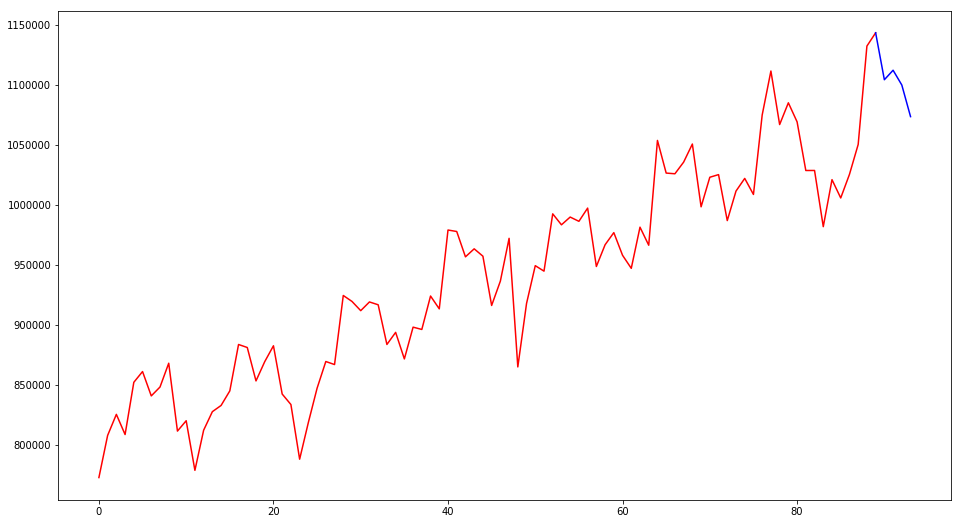

In [74]:

plt.plot(forecast_truevalues_combined.IssuesInMonth.iloc[0:90], 'r', forecast_truevalues_combined.IssuesInMonth.iloc[89:94], 'b')
plt.savefig('forecast_plotted.png')